## Task 4.10, pt.1 - Table of Contents

#### Part 1.1

#### Import libraries, assign path and import dataset
##### Import Python libraries, assign path and import main dataset
#### Address possible security implications
#### Create a regional segmentation column
##### Determine and visualize spending differences between regions
#### Create exclusion flag for low-activity customers
##### Drop low-activity customer data from main dataset

#### Part 1.2

#### Import libraries, assign path and import updated dataset
#### Customer Profiles
##### Creating and visualizing customer profiles
##### Importing and joining product department information to main dataset
#### Comparing and visualizing order habits across customer profiles
##### For each customer profile, finding and visualizing the following information:
##### Product department choice, time and day of orders, expenditure level and order frequency.
#### Aggregating minimum, maximum and mean values of expenditure and order frequency for each customer profile
#### Visualizing the regional distribution of customer profiles
#### Additional visualizations

### Import libaries, assign path and import dataset

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#assign path
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 4\Instacart Basket Analysis'

In [5]:
#import ords_prods_customers data set
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [12]:
ords_prods_customers.dtypes

order_id                         int64
user_id                          int64
eval_set                        object
order_number                     int64
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
product_id                       int64
add_to_cart_order                int64
reordered                        int64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
match                         category
price_range_loc                 object
busiest_day                     object
busiest_days                    object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
avg_prod_price                 float64
spending_flag                   object
avg_days_since_prior_order     float64
orderfreq_flag                  object
Unnamed: 0               

In [13]:
ords_prods_customers.shape

(32399732, 36)

### Possible Security Implications

This dataset does contain information about users that could be considered personally-identifiable information (PII), such as first and last names, age, marital status and state of residence. 
However, it is worth noting that the user information as well as the prices contained in this dataset are completely fictional. 

### Creating a Region column that sorts customer data by region

In [16]:
#create a for-loop that labels values in the state column based on the region they belong to

In [17]:
result = []

for value in ords_prods_customers["state"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append("South")
  else:
    result.append("West")

In [18]:
#create new column based on result of for-loop
ords_prods_customers['region'] = result

In [70]:
ords_prods_customers['region'].value_counts()

region
South        10309442
West          7926057
Midwest       7260306
Northeast     5463882
Name: count, dtype: int64

#### Determine the difference in spending habits between regions

In [20]:
#create a crosstab for the spending_flag and region columns
crosstab = pd.crosstab(ords_prods_customers['spending_flag'], ords_prods_customers['region'], dropna = False)

In [21]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,154715,107381,207902,159120
Low spender,7441350,5614511,10582194,8132559


In [22]:
crosstab.T

spending_flag,High spender,Low spender
region,,
Midwest,154715,7441350
Northeast,107381,5614511
South,207902,10582194
West,159120,8132559


In [23]:
crosstab_t = crosstab.T

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

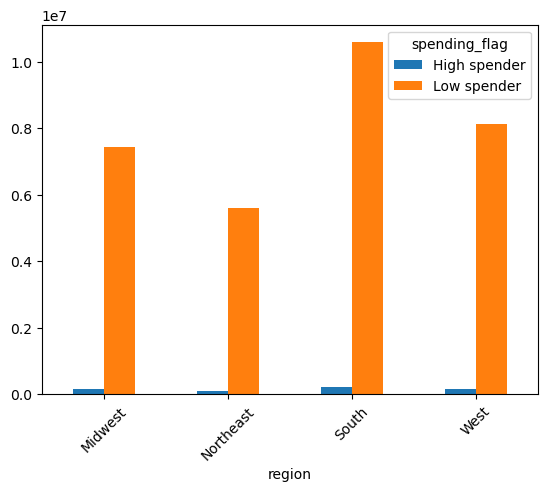

In [24]:
#create bar chart showing number of high vs low spenders in each region
region_spend_bar = crosstab_t.plot.bar()
plt.xticks(rotation=45)

We can already see that the number of low spenders is much higher across all regions. The South contains the largest overall number of customers and therefore has the highest number of both high and low spenders. To better understand the connection between region and spending habits, we must find the percentage of customers by spending habits.

In [26]:
region_spend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spend_bar.png'))

In [27]:
crosstab_t.to_clipboard()

In [28]:
#transposed the crosstab results to make it easier to get the ratio of high to low spenders

In Excel, I calculated that the Midwest region has the highest percentage of high spenders (2.05%) and the Northeast has the lowest (1.89%).

### Create exclusion flag for customers with less than 5 orders

In [31]:
#flag customers to be excluded (with less than 5 orders)
ords_prods_customers.loc[ords_prods_customers['max_order'] < 5, 'low_activity_excl_flag'] = 'Exclude'

In [32]:
#flag customers with 5 or more orders
ords_prods_customers.loc[ords_prods_customers['max_order'] >= 5, 'low_activity_excl_flag'] = 'Keep'

In [33]:
#check counts of flagged customers
ords_prods_customers['low_activity_excl_flag'].value_counts()

low_activity_excl_flag
Keep       30959687
Exclude     1440045
Name: count, dtype: int64

In [34]:
#check results of exclusion flag in excel
crosstab_excl_flag = pd.crosstab(ords_prods_customers['max_order'], ords_prods_customers['low_activity_excl_flag'], dropna=False)

In [35]:
crosstab_excl_flag.to_clipboard()

In [36]:
#confirmed in excel that all rows with max_order under 5 are labelled 'Exclude'

#### Drop low-activity customers from main dataframe, save low-activity customer data separately

In [38]:
#create separate dataframe for customers to be excluded
ords_prods_customers_low_activity = ords_prods_customers[ords_prods_customers['low_activity_excl_flag'] == 'Exclude']

In [39]:
#export excluded customers data
ords_prods_customers_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_to_exclude.pkl'))

In [40]:
#update main dataframe to drop excluded customer data
ords_prods_customers = ords_prods_customers[ords_prods_customers['low_activity_excl_flag'] == 'Keep']

In [41]:
#drop low activity flag column from main dataframe
ords_prods_customers.drop(columns = ['low_activity_excl_flag'], inplace=True)

In [42]:
#export updated main dataframe to pkl
ords_prods_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers.pkl'))